In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics  import accuracy_score, precision_score, recall_score, mean_squared_error, mean_absolute_error, r2_score



**Problem 2**

- a) How does income inequality relate to the number of hate crimes and hate incidents? [5 points]
- b) How can we predict the number of hate crimes and hate incidents from race/nature of the population? [5 points]
- c) How does the number of hate crimes vary across states? Is there any similarity in number of hate incidents (per 100,000 people) between some states than in others — both according to the SPLC after the election and the FBI before it? [10 points]

Note: For the first two questions:

Choose the variables which you think are related to the predictors (income inequality, race and nature of the population) to build your model. Justify your selection.
Refine your model iteratively.

In [3]:
#Reading dataset
df2 = pd.read_csv('~/UW/IMT_574/Week5/Homework/hatecrime.csv')
#Adding constant
df2['constant'] = 1
df2.head(30)

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi,constant
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410,1
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700,1
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928,1
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209,1
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986,1
5,Colorado,60940,0.040,0.80,0.893,0.06,0.07,0.457,0.31,0.44,0.390523,2.804689,1
6,Connecticut,70161,0.052,0.94,0.886,0.06,0.06,0.486,0.30,0.41,0.335392,3.772701,1
7,Delaware,57522,0.049,0.90,0.874,0.05,0.08,0.440,0.37,0.42,0.322754,1.469980,1
8,District of Columbia,68277,0.067,1.00,0.871,0.11,0.04,0.532,0.63,0.04,1.522302,10.953480,1
9,Florida,46140,0.052,0.96,0.853,0.09,0.11,0.474,0.46,0.49,0.187521,0.698070,1


In [4]:
#Checking for missing values to impute
df2.isna().any()

state                                       False
median_household_income                     False
share_unemployed_seasonal                   False
share_population_in_metro_areas             False
share_population_with_high_school_degree    False
share_non_citizen                            True
share_white_poverty                         False
gini_index                                  False
share_non_white                             False
share_voters_voted_trump                    False
hate_crimes_per_100k_splc                    True
avg_hatecrimes_per_100k_fbi                  True
constant                                    False
dtype: bool

In [5]:
#Imputing NaN values with mean values
mean_value_splc = df2['hate_crimes_per_100k_splc'].mean() 
mean_value_fbi = df2['avg_hatecrimes_per_100k_fbi'].mean() 
mean_value_non_citizen = df2['share_non_citizen'].mean() 

df2['hate_crimes_per_100k_splc'].fillna(value=mean_value_splc, inplace=True) 
df2['avg_hatecrimes_per_100k_fbi'].fillna(value=mean_value_fbi, inplace=True) 
df2['share_non_citizen'].fillna(value=mean_value_non_citizen, inplace=True) 

In [6]:
# df2.info()

In [7]:
def get_metrics(y_test, y_pred, legend):
    mse = mean_squared_error(y_test, y_pred)
    mae  = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(legend)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2): {r2}")

a) Using Linear Regression- Ordinary Least Squares:

Using Gini index as feature of income inequality:

***"The Gini index, also known as the Gini coefficient or Gini ratio, is a statistical measurement of inequality in income, wealth, or consumption within a group or country"***

- Checking the relation between gini_index and hate_crimes_per_100k_splc

Text(0.5, 1.0, 'Hate crimes per 100,000 population, Southern Poverty Law Center, Nov. 9-18, 2016')

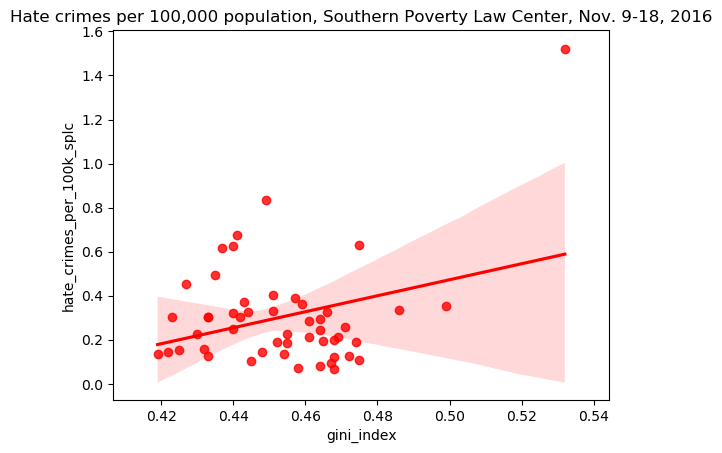

In [8]:

sns.regplot(x='gini_index', y='hate_crimes_per_100k_splc', data=df2,  
    color = 'red').set_title('Hate crimes per 100,000 population, Southern Poverty Law Center, Nov. 9-18, 2016')

In [9]:
#Outcome or label variable
y_splc = df2.hate_crimes_per_100k_splc
#Features or predictor variables
X_splc = df2[['gini_index', 'constant' ]]

In [10]:
#Splitting the dataset in training(70%) and testing (30%) data
X_train_splc, X_test_splc, y_train_splc, y_test_splc = train_test_split(X_splc, y_splc, test_size=0.3, random_state=20)

In [11]:
#Trainig the model
lr_model_splc = sm.OLS(y_train_splc, X_train_splc).fit()

In [12]:
lr_model_splc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     hate_crimes_per_100k_splc   R-squared:                       0.027
Model:                                   OLS   Adj. R-squared:                 -0.002
Method:                        Least Squares   F-statistic:                    0.9245
Date:                       Fri, 25 Oct 2024   Prob (F-statistic):              0.343
Time:                               13:49:22   Log-Likelihood:                 19.151
No. Observations:                         35   AIC:                            -34.30
Df Residuals:                             33   BIC:                            -31.19
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gini_index    -1.3583      1.413     -0.962      0.343      -4.232       1.516
constant       0.8764      0.642      1.365      0.181      -0.430       2.182
==============================================================================
Omnibus:                        6.692   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                5.345
Skew:                           0.916   Prob(JB):                       0.0691
Kurtosis:                       3.555   Cond. No.                         69.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
df3 = df2.drop(['state'],axis=1)
corrs = df3.corr()
corrs

,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi,constant
median_household_income,1.000000,-0.376722,0.286480,0.653490,0.286975,-0.818045,-0.178821,0.103775,-0.597528,0.338097,0.308291,NaN
share_unemployed_seasonal,-0.376722,1.000000,0.358113,-0.621168,0.269593,0.209440,0.541659,0.431847,-0.148192,0.074931,0.072321,NaN
share_population_in_metro_areas,0.286480,0.358113,1.000000,-0.268846,0.697887,-0.385559,0.515843,0.547672,-0.570695,0.144956,0.209820,NaN
share_population_with_high_school_degree,0.653490,-0.621168,-0.268846,1.000000,-0.261761,-0.494008,-0.592052,-0.434846,-0.155656,0.292637,0.162383,NaN
share_non_citizen,0.286975,0.269593,0.697887,-0.261761,1.000000,-0.367727,0.473314,0.709273,-0.618857,0.230376,0.294412,NaN
share_white_poverty,-0.818045,0.209440,-0.385559,-0.494008,-0.367727,1.000000,0.032584,-0.269449,0.552849,-0.283120,-0.258029,NaN
gini_index,-0.178821,0.541659,0.515843,-0.592052,0.473314,0.032584,1.000000,0.468467,-0.411543,0.313206,0.417005,NaN
share_non_white,0.103775,0.431847,0.547672,-0.434846,0.709273,-0.269449,0.468467,1.000000,-0.488838,0.041580,0.075484,NaN
share_voters_voted_trump,-0.597528,-0.148192,-0.570695,-0.155656,-0.618857,0.552849,-0.411543,-0.488838,1.000000,-0.597729,-0.491171,NaN
hate_crimes_per_100k_splc,0.338097,0.074931,0.144956,0.292637,0.230376,-0.283120,0.313206,0.041580,-0.597729,1.000000,0.729283,NaN


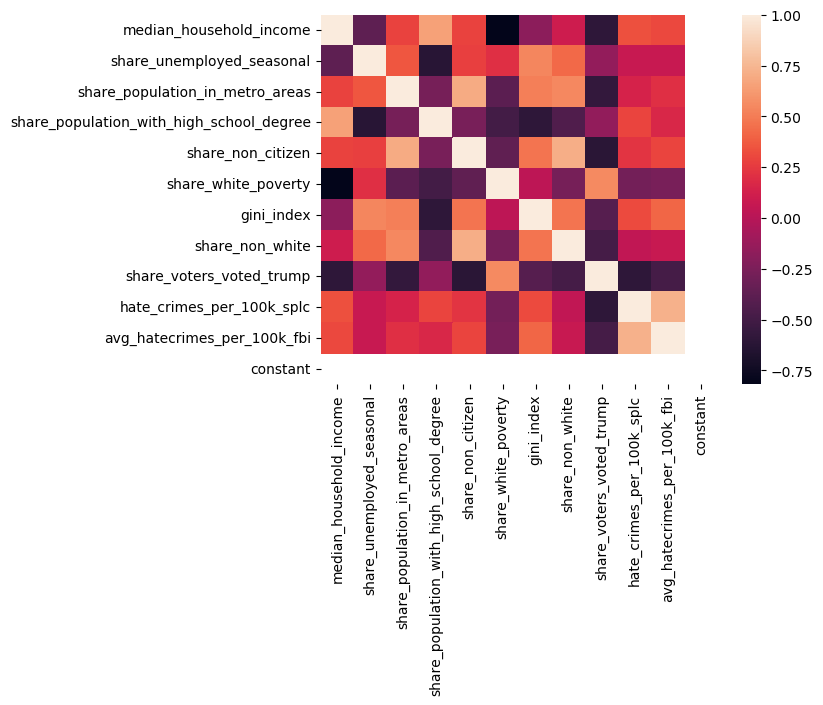

In [14]:
sns.heatmap(corrs)

In [15]:
y_pred_splc = lr_model_splc.predict(X_test_splc)
get_metrics(y_test_splc, y_pred_splc,"Scores for Linear Regression model to predict the hate_crimes_per_100k_splc label, using gini_index as feature:")

Scores for Linear Regression model to predict the hate_crimes_per_100k_splc label, using gini_index as feature:
Mean Squared Error (MSE): 0.16290263942834304
Mean Absolute Error (MAE): 0.23404615676455084
R-squared (R2): -0.29590868137521986


- Checking the relation between median_household_income and avg_hatecrimes_per_100k_fbi

Text(0.5, 1.0, 'Average annual hate crimes per 100,000 population, FBI, 2010-2015')

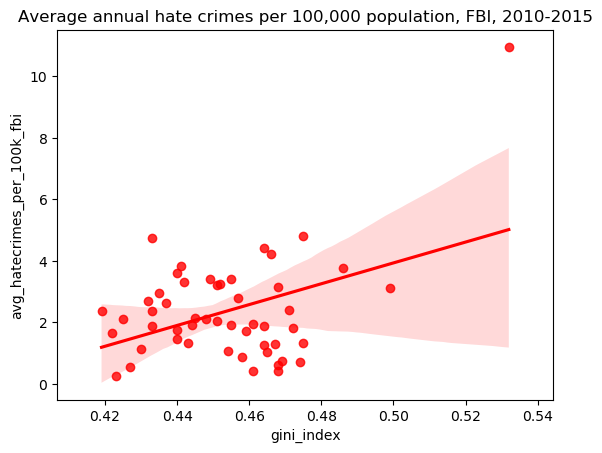

In [16]:
sns.regplot(x='gini_index', y='avg_hatecrimes_per_100k_fbi', data=df2,  
    color = 'red').set_title('Average annual hate crimes per 100,000 population, FBI, 2010-2015')

In [17]:
#Outcome or label variable
y_fbi = df2.avg_hatecrimes_per_100k_fbi
#Features or predictor variables
X_fbi = df2[['gini_index', 'constant' ]]

In [18]:
#Splitting the dataset in training(70%) and testing (30%) data
X_train_fbi, X_test_fbi, y_train_fbi, y_test_fbi, = train_test_split(X_fbi, y_fbi, test_size=0.3, random_state=20)

In [19]:
#Trainig the model
lr_model_fbi = sm.OLS(y_train_fbi, X_train_fbi).fit()

In [20]:
lr_model_fbi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     avg_hatecrimes_per_100k_fbi   R-squared:                       0.005
Model:                                     OLS   Adj. R-squared:                 -0.025
Method:                          Least Squares   F-statistic:                    0.1782
Date:                         Fri, 25 Oct 2024   Prob (F-statistic):              0.676
Time:                                 13:49:23   Log-Likelihood:                -55.132
No. Observations:                           35   AIC:                             114.3
Df Residuals:                               33   BIC:                             117.4
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gini_index     4.9795     11.797      0.422      0.676     -19.022      28.981
constant      -0.0477      5.361     -0.009      0.993     -10.954      10.859
==============================================================================
Omnibus:                        1.637   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.549
Skew:                           0.443   Prob(JB):                        0.461
Kurtosis:                       2.472   Cond. No.                         69.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
y_pred_fbi= lr_model_fbi.predict(X_test_fbi)
get_metrics(y_test_fbi, y_pred_fbi,"Scores for Linear Regression model to predict the avg_hatecrimes_per_100k_fbi label, using gini_index as feature:")

Scores for Linear Regression model to predict the avg_hatecrimes_per_100k_fbi label, using gini_index as feature:
Mean Squared Error (MSE): 5.6605945418807275
Mean Absolute Error (MAE): 1.42257966722903
R-squared (R2): 0.028660307918846883


***The FBI average appears to give a less accurate prediction than the previous model with the totals from the SPLC***

The MSE and MAE increased, although the R-Squared decreased. All this tells us that since the FBI shows average, the predictions are less accurate and more prone to overfitting.

b) Using Linear Regression- Ordinary Least Squares:

For hate crimes in 2016, according to the SPLC:

*Using the share_non_white, share_white_poverty, share_non_citizen, share_population_with_high_school_degree, share_population_in_metro_areas as predictors, what we will call by race/nature:*

In [22]:
#Outcome or label variable
y_race = df2.hate_crimes_per_100k_splc
#Features or predictor variables
X_race = df2[['share_non_white','share_white_poverty','share_population_with_high_school_degree', 'share_population_in_metro_areas','constant' ]]

In [23]:
#Splitting the dataset in training(70%) and testing (30%) data
X_train_race, X_test_race, y_train_race, y_test_race = train_test_split(X_race, y_race, test_size=0.3, random_state=20)

In [24]:
#Trainig the model
lr_model_race = sm.OLS(y_train_race, X_train_race).fit()

In [25]:
lr_model_race.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     hate_crimes_per_100k_splc   R-squared:                       0.345
Model:                                   OLS   Adj. R-squared:                  0.257
Method:                        Least Squares   F-statistic:                     3.942
Date:                       Fri, 25 Oct 2024   Prob (F-statistic):             0.0109
Time:                               13:49:24   Log-Likelihood:                 26.060
No. Observations:                         35   AIC:                            -42.12
Df Residuals:                             30   BIC:                            -34.34
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
share_non_white                              0.0195      0.174      0.112      0.912      -0.336       0.375
share_white_poverty                          1.3483      1.685      0.800      0.430      -2.093       4.790
share_population_with_high_school_degree     3.2590      1.082      3.013      0.005       1.050       5.468
share_population_in_metro_areas              0.0820      0.159      0.514      0.611      -0.244       0.408
constant                                    -2.7649      1.140     -2.425      0.022      -5.094      -0.436
==============================================================================
Omnibus:                        1.697   Durbin-Watson:                   2.385
Prob(Omnibus):                  0.428   Jarque-Bera (JB):                0.718
Skew:                           0.220   Prob(JB):                        0.698
Kurtosis:                       3.547   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value for share_population_with_high_school_degree is very low (p-value=0.005 < alpha=0.05), so we cannot reject the null hyphotesis and we can discard the feature since it's not statistically significant. The rest of the features appear to be statistically significant.

In [26]:
X_race = df2[['share_non_white','share_white_poverty', 'share_population_in_metro_areas','constant' ]]
#Splitting the dataset in training(70%) and testing (30%) data
X_train_race, X_test_race, y_train_race, y_test_race, = train_test_split(X_race, y_race, test_size=0.3, random_state=20)
#Trainig the model
lr_model_race = sm.OLS(y_train_race, X_train_race,).fit()
lr_model_race.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     hate_crimes_per_100k_splc   R-squared:                       0.146
Model:                                   OLS   Adj. R-squared:                  0.064
Method:                        Least Squares   F-statistic:                     1.769
Date:                       Fri, 25 Oct 2024   Prob (F-statistic):              0.173
Time:                               13:49:24   Log-Likelihood:                 21.434
No. Observations:                         35   AIC:                            -34.87
Df Residuals:                             31   BIC:                            -28.65
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
share_non_white                    -0.2449      0.169     -1.452      0.157      -0.589       0.099
share_white_poverty                -2.1705      1.364     -1.591      0.122      -4.953       0.612
share_population_in_metro_areas    -0.1144      0.163     -0.700      0.489      -0.448       0.219
constant                            0.6260      0.206      3.045      0.005       0.207       1.045
==============================================================================
Omnibus:                        5.616   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                4.330
Skew:                           0.834   Prob(JB):                        0.115
Kurtosis:                       3.432   Cond. No.                         76.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
y_pred_race= lr_model_race.predict(X_test_race)
get_metrics(y_test_race, y_pred_race,"Scores for Linear Regression model to predict the hate_crimes_per_100k_splc label, using gini_index as feature:")

Scores for Linear Regression model to predict the hate_crimes_per_100k_splc label, using gini_index as feature:
Mean Squared Error (MSE): 0.14725103442128615
Mean Absolute Error (MAE): 0.23880328964701916
R-squared (R2): -0.17139841636491648


For hate crimes in 2010-2015, according to the FBI:

In [28]:
#Outcome or label variable
y_race = df2.avg_hatecrimes_per_100k_fbi
#Features or predictor variables
X_race = df2[['share_non_white','share_white_poverty','share_population_with_high_school_degree', 'share_population_in_metro_areas','constant' ]]

#Splitting the dataset in training(70%) and testing (30%) data
X_train_race, X_test_race, y_train_race, y_test_race = train_test_split(X_race, y_race, test_size=0.3, random_state=20)

#Trainig the model
lr_model_race = sm.OLS(y_train_race, X_train_race).fit()

lr_model_race.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     avg_hatecrimes_per_100k_fbi   R-squared:                       0.159
Model:                                     OLS   Adj. R-squared:                  0.047
Method:                          Least Squares   F-statistic:                     1.421
Date:                         Fri, 25 Oct 2024   Prob (F-statistic):              0.251
Time:                                 13:49:24   Log-Likelihood:                -52.191
No. Observations:                           35   AIC:                             114.4
Df Residuals:                               30   BIC:                             122.2
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
share_non_white                             -1.1259      1.627     -0.692      0.494      -4.449       2.198
share_white_poverty                         -2.7535     15.763     -0.175      0.863     -34.946      29.439
share_population_with_high_school_degree    11.5634     10.117      1.143      0.262      -9.099      32.226
share_population_in_metro_areas              1.3993      1.492      0.938      0.356      -1.647       4.446
constant                                    -8.2677     10.666     -0.775      0.444     -30.050      13.514
==============================================================================
Omnibus:                        0.806   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.668   Jarque-Bera (JB):                0.829
Skew:                           0.192   Prob(JB):                        0.661
Kurtosis:                       2.351   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All the  the features taken into consideration appear to be statistically significant.

In [29]:
X_race = df2[['share_non_white','share_white_poverty', 'share_population_in_metro_areas','constant' ]]
#Splitting the dataset in training(70%) and testing (30%) data
X_train_race, X_test_race, y_train_race, y_test_race, = train_test_split(X_race, y_race, test_size=0.3, random_state=20)
#Trainig the model
lr_model_race = sm.OLS(y_train_race, X_train_race,).fit()
lr_model_race.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     avg_hatecrimes_per_100k_fbi   R-squared:                       0.123
Model:                                     OLS   Adj. R-squared:                  0.038
Method:                          Least Squares   F-statistic:                     1.444
Date:                         Fri, 25 Oct 2024   Prob (F-statistic):              0.249
Time:                                 13:49:24   Log-Likelihood:                -52.937
No. Observations:                           35   AIC:                             113.9
Df Residuals:                               31   BIC:                             120.1
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
share_non_white                    -2.0640      1.412     -1.462      0.154      -4.944       0.816
share_white_poverty               -15.2384     11.420     -1.334      0.192     -38.530       8.053
share_population_in_metro_areas     0.7024      1.368      0.513      0.611      -2.088       3.493
constant                            3.7638      1.721      2.187      0.036       0.253       7.274
==============================================================================
Omnibus:                        1.693   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.304
Skew:                           0.263   Prob(JB):                        0.521
Kurtosis:                       2.214   Cond. No.                         76.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
y_pred_race= lr_model_race.predict(X_test_race)
get_metrics(y_test_race, y_pred_race,"Scores for Linear Regression model to predict the avg_hatecrimes_per_100k_fbi label, using gini_index as feature:")

Scores for Linear Regression model to predict the avg_hatecrimes_per_100k_fbi label, using gini_index as feature:
Mean Squared Error (MSE): 5.978632375113645
Mean Absolute Error (MAE): 1.4826772451664332
R-squared (R2): -0.0259139543281679


c) 